### Hypothesis testing: Lab 7

Elements of Data Science

In [1]:
import numpy as np
from datascience import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Hypothesis Testing

**Question 7: Complete the simulation below, which samples num_changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis.** 

Your job is to:
fill in the function simulate_under_null, which simulates a single sample under the null hypothesis, and
fill in its argument when it's called below.
**As a hint, num_changes should be approximately the number of countries times the number of time comparisons (you can find the number of year comparisons by using diff_n().**


## How to approach the problem

### Step 1: Make sure you understand the part of the function that was given to you.

In [3]:
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))

uniform

Change,Chance
Increase,0.5
Decrease,0.5


### Step 2: Try the sample the sample_from_distribution method of datatables.

In [4]:
sample = uniform.sample_from_distribution('Chance', 10)
sample

Change,Chance,Chance sample
Increase,0.5,4
Decrease,0.5,6


### Step 3: Add this to your function
For the each sample created by the simulation we have to simulate having the same amount of data as in our observation.

In [8]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of your
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)
    return sample

In [9]:
sample = simulate_under_null(10)
sample

Change,Chance,Chance sample
Increase,0.5,2
Decrease,0.5,8


## Step 4: We want to return the net positive increases

In [10]:
net = sample.column('Chance sample')[0] - sample.column('Chance sample')[1]
net

-6

## Step 5: Add this to you function, too.

In [11]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of your
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)
    net = sample.column('Chance sample')[0] - sample.column('Chance sample')[1]
    return net

In [12]:
sample = simulate_under_null(10)
sample

-4

## Step 6: Look at the second function

The function is nearly complete. It just wants your to figure out the correct value for num_changes. **Look back at the hint!**
"As a hint, num_changes should be approximately the number of countries times the number of time comparisons (you can find the number of year comparisons by using diff_n()."

In [13]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

diff_n(make_array(1, 10, 100, 1000, 10000), 2)

array([  99,  990, 9900])

Notice that the number of changes is just one less than the number of values in the array. In this case, that would be then number of years of temperature data available for each country.
How do we find that?

In [14]:
# Example Table
example = Table().with_columns(
    "Year",
    make_array(2000, 2001, 2002, 2003, 2000, 2001, 2002),
    "Country",
    make_array("France", "France", "France", "France", "England", "England", "England"),
)
example

Year,Country
2000,France
2001,France
2002,France
2003,France
2000,England
2001,England
2002,England


In [15]:
grouped_example = example.group("Country")
grouped_example

Country,count
England,3
France,4


In [16]:
np.sum(grouped_example.column('count'))

7

In [17]:
len(np.unique(example.column('Country'))) 

2

In [18]:
num_changes = np.sum(grouped_example.column('count')) - len(np.unique(example.column('Country')))
num_changes

5

In [19]:
def empirical_distribution(tbl):
    num_changes = ...
    samples = make_array()
    for i in np.arange(10000):
        samples = np.append(samples, simulate_under_null(...)) 
    Table().with_column('Test statistic under null', samples).hist(bins=np.arange(0, max(samples) + max(samples) * 0.1, 2))
    return samples

This function is ready for you to pass in the table: changes_by_country after you fix num_changes.

## HINTS: Mount St. Helens Mini-project

In [29]:
# Plot description dataset
datafile = "../../Mini Project II/data/MSH_PLOT_DESCRIPTORS2.csv"
MSH_PLOT = Table.read_table(datafile)
MSH_PLOT.where('PLOT_CODE','ABPL10')

PLOT_NAME,PLOT_CODE,FIRST_YEAR,LAST_YEAR,UTMGRID,UTMEAST,UTMNORTH,LONG,LAT,POT._RAD.,HEAT_LOAD,ELEVATION(M),ASPECT,SLOPE,IMPACT_TYPE,SUCCESSION_TYPE
Abraham Plain10,ABPL10,1995,2009,10T,566130,5117818,122.143,46.2107,0.893,0.881,1376,E,2,Blast; Scour; Pumice,Primary


In [23]:
np.unique(MSH_PLOT['PLOT_CODE'])

array(['ABPL01', 'ABPL02', 'ABPL03', 'ABPL04', 'ABPL05', 'ABPL06',
       'ABPL07', 'ABPL08', 'ABPL09', 'ABPL10', 'BUCA01', 'BUCA03',
       'BUCA04', 'BUCB01', 'BUCB02', 'BUCB03', 'BUCB04', 'BUCB05',
       'BUCB06', 'BUCB07', 'BUCC01', 'BUCC02', 'BUCC03', 'BUCD01',
       'BUCD02', 'BUCD03', 'BUCD05', 'LAH04', 'LAH05', 'LAH06', 'LAH07',
       'LAH08', 'LAHR01', 'LAHR02', 'PICA01', 'PICA02', 'PICA03', 'PICA04',
       'PICB01', 'PICB02', 'PICB03', 'PICB04', 'PICB05', 'PICE02',
       'PICE03', 'PICE04', 'PUPL01', 'PUPL02', 'PUPL03', 'PUPL04',
       'PUPL05', 'PUPL06', 'PUPL07', 'PUPL08', 'PUPL09', 'PUPL10',
       'PUPL11', 'PUPL12', 'SFTR01', 'SFTR02', 'SFTR03', 'SFTR04',
       'STRD01', 'STRD02', 'STRD03', 'STRD04', 'STRD05', 'STRD06',
       'STRD07', 'STRD08', 'STRD09', 'STRD10', 'STRD11', 'STRD12',
       'STRD13', 'STRD14', 'STRD15', 'STRD16', 'STRD17', 'STRD18',
       'STRD19', 'STRD20', 'TORD01', 'TORD02', 'TORD03', 'TORD04',
       'TORD05', 'TORD06', 'TORD07', 'TORD08', 

In [24]:
MSH_PLOT = MSH_PLOT.with_columns('NLONG',-1*(MSH_PLOT.column('LONG')))
MSH_map = MSH_PLOT.select('LAT', 'NLONG', 'PLOT_CODE').relabel('PLOT_CODE', 'labels')
Circle.map_table(MSH_map, color='blue',area=200)

In [26]:
datafile = "../../Mini Project II/data/MSH_STRUCTURE_PLOT_YEAR.csv"
MSH_YEAR = Table.read_table(datafile)
MSH_YEAR.show(4)

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7
ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1
ABPL011997,ABPL,1,1997,18,4.2,2.231,0.772,11.6
ABPL011999,ABPL,1,1999,19,5.9,2.268,0.77,14.2


In [27]:
np.unique(MSH_YEAR['PLOT_NAME'])

array(['ABPL', 'BUCA', 'BUCB', 'BUCC', 'BUCD', 'LAHR', 'PICA', 'PICB',
       'PICE', 'PUPL', 'SFTR', 'STRD', 'TORD'],
      dtype='<U4')

## Comparing plots

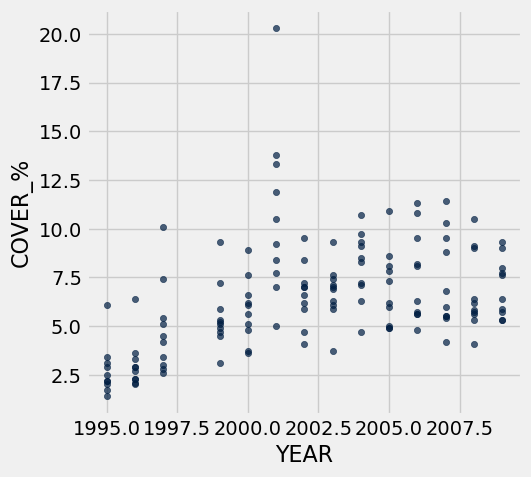

In [28]:
MSH_YEAR.where('PLOT_NAME','ABPL').scatter("YEAR","COVER_%")

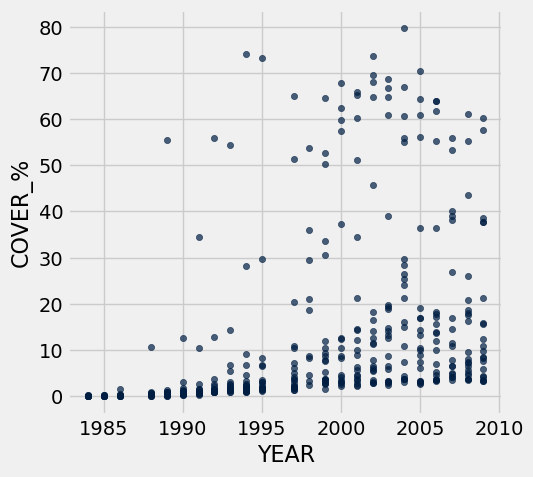

In [33]:
MSH_YEAR.where('PLOT_NAME','STRD').scatter("YEAR","COVER_%")

### Maybe compare average COVER_% for a given year?

In [38]:
abpl_2000 = MSH_YEAR.where("YEAR", are.equal_to(2000)).where("PLOT_NAME", are.equal_to("ABPL"))
abpl_2000.show(3)

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL012000,ABPL,1,2000,17,6.2,2.111,0.745,9.1
ABPL022000,ABPL,2,2000,12,5.1,1.594,0.641,12.2
ABPL032000,ABPL,3,2000,21,8.9,2.137,0.702,4.8


In [39]:
strd_2000 = MSH_YEAR.where("YEAR", are.equal_to(2000)).where("PLOT_NAME", are.equal_to("STRD"))
strd_2000.show(3)

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
STRD012000,STRD,1,2000,20,59.7,1.775,0.593,23.2
STRD022000,STRD,2,2000,14,62.4,1.207,0.457,27
STRD032000,STRD,3,2000,17,57.4,0.625,0.221,15.8


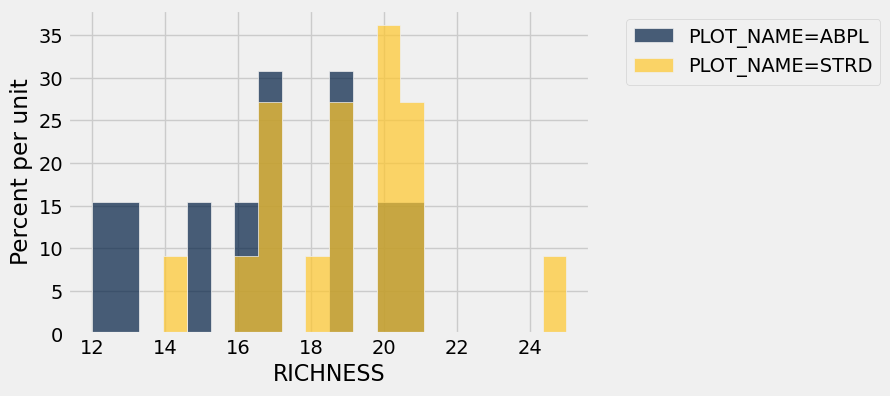

In [43]:
two_plots = abpl_2000.append(strd_2000)
two_plots.hist("RICHNESS", group="PLOT_NAME", bins = 20)

In [44]:
two_plots.group("PLOT_NAME", np.mean)

PLOT_NAME,PLOT_ID mean,PLOT_NUMBER mean,YEAR mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean
ABPL,,5.5,2000,16.9,5.82,2.0752,0.7351,8.64
STRD,,11.0588,2000,19.0588,21.1588,1.93318,0.654588,10.8118


### Is the difference in average richness between the two plot you chose statistically significant?

# Trends over time

In [30]:
MSH_YEAR.where('PLOT_NAME','ABPL').group("YEAR",np.mean)

YEAR,PLOT_ID mean,PLOT_NAME mean,PLOT_NUMBER mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean
1995,,,5.5,14.1,2.75,2.2426,0.8533,6.7
1996,,,5.5,15.4,3.05,2.3348,0.8591,8.19
1997,,,5.5,17.4,4.85,2.2334,0.7871,10.01
1999,,,5.5,18.2,5.52,2.2438,0.7754,9.93
2000,,,5.5,16.9,5.82,2.0752,0.7351,8.64
2001,,,5.5,17.8,10.71,1.9739,0.6895,11.9
2002,,,5.5,17.9,6.66,2.0938,0.7287,12
2003,,,5.5,19,6.73,2.2543,0.772,14.43
2004,,,5.5,18.5,8.09,2.1048,0.729,15.44
2005,,,5.5,15,6.97,2.0314,0.7583,14.86


(1995.0, 2010.0)

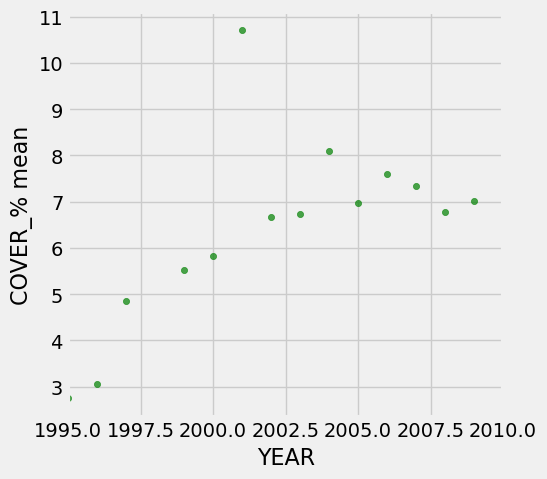

In [32]:
MSH_YEAR.where('PLOT_NAME','ABPL').group("YEAR",np.mean).scatter("YEAR", "COVER_% mean", color='green')
plt.xlim(1995,2010)

## Is this trend random or non-random?  (Same idea as Lab07)